# フィルターバンクと特徴量づくり

演習課題の内容は、`gabor_features-JA.pdf`を参照すること。

### 目次
- <a href="#1D_basics">1次元のGaborフィルター</a>
- <a href="#1D_app">（承前）1次元の応用例</a>
- <a href="#2D_basics">2次元のGaborフィルター</a>
- <a href="#2D_app">（承前）2次元の応用例</a>

<a id="1D_basics"></a>
## 1次元のGaborフィルター


In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal

import gabor

_fontsize = "xx-large"

フィルタ自体は、複数のパラメータによって決められる。下記のdictでそれらの値を格納する。

In [2]:
myparas = {"amp": 1/(2*math.pi),
           "sdev": 1,
           "freq": 1,
           "phase": 0}

可視化したいので、とりあえず計算してみる。

In [3]:
t_inputs = np.linspace(-3,3,500)

out_car_real = gabor.G_car_real(t=t_inputs, freq=myparas["freq"], phase=myparas["phase"])
out_car_imag = gabor.G_car_imag(t=t_inputs, freq=myparas["freq"], phase=myparas["phase"])
out_env = gabor.G_env(t=t_inputs, amp=myparas["amp"], sdev=myparas["sdev"])
out_fil_real = gabor.G_fil_real(t=t_inputs, paras=myparas)
out_fil_imag = gabor.G_fil_imag(t=t_inputs, paras=myparas)

算出した値をすべてプロットする。

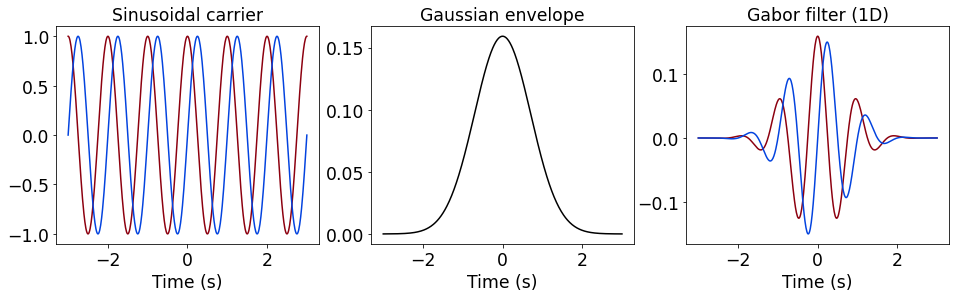

In [4]:
myfig = plt.figure(figsize=(16,4))

ax_carrier = myfig.add_subplot(1,3,1)
plt.title("Sinusoidal carrier", fontsize=_fontsize)
plt.xlabel("Time (s)", fontsize=_fontsize)
ax_carrier.plot(t_inputs, out_car_real, color="xkcd:crimson")
ax_carrier.plot(t_inputs, out_car_imag, color="xkcd:blue")
ax_carrier.tick_params(labelsize=_fontsize)

ax_envelope = myfig.add_subplot(1,3,2)
plt.title("Gaussian envelope", fontsize=_fontsize)
plt.xlabel("Time (s)", fontsize=_fontsize)
ax_envelope.plot(t_inputs, out_env, color="xkcd:black")
ax_envelope.tick_params(labelsize=_fontsize)

ax_filter = myfig.add_subplot(1,3,3)
plt.title("Gabor filter (1D)", fontsize=_fontsize)
plt.xlabel("Time (s)", fontsize=_fontsize)
ax_filter.plot(t_inputs, out_fil_real, color="xkcd:crimson")
ax_filter.plot(t_inputs, out_fil_imag, color="xkcd:blue")
ax_filter.tick_params(labelsize=_fontsize)

#plt.savefig(fname="slides_Gabor_1D.pdf", bbox_inches="tight")
plt.show()

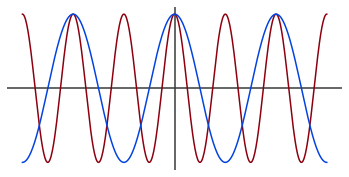

In [5]:
### FOR SLIDES. ###

myfig = plt.figure(figsize=(6,3))
ax = myfig.add_subplot(1,1,1)
plt.axis("off")

plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")
ax.plot(t_inputs, out_car_real, color="xkcd:crimson")
ax.plot(t_inputs,
        gabor.G_car_real(t=t_inputs, freq=0.5*myparas["freq"], phase=myparas["phase"]),
        color="xkcd:blue")

ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.
ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.
#plt.savefig(fname="slides_signal_1D.pdf", bbox_inches="tight")
plt.show()

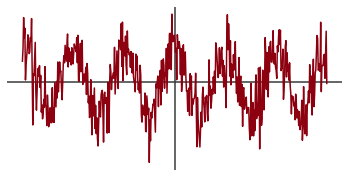

In [6]:
### FOR SLIDES. ###

myfig = plt.figure(figsize=(6,3))
ax = myfig.add_subplot(1,1,1)
plt.axis("off")

plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")

toplot = np.copy(out_car_real)
toplot += np.random.normal(size=(t_inputs.size,), scale=0.5)

ax.plot(t_inputs, toplot, color="xkcd:crimson")

ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.
ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.
#plt.savefig(fname="slides_signal_1D_noisy.pdf", bbox_inches="tight")
plt.show()

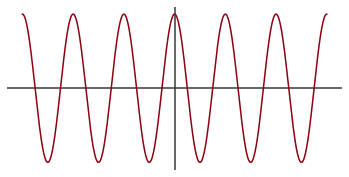

In [7]:
### FOR SLIDES. ###

myfig = plt.figure(figsize=(6,3))
ax = myfig.add_subplot(1,1,1)
plt.axis("off")

plt.axvline(x=0.0, color="xkcd:dark grey")
plt.axhline(y=0.0, color="xkcd:dark grey")

ax.plot(t_inputs, out_car_real, color="xkcd:crimson")

ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.
ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.

#plt.savefig(fname="slides_signal_1D_clean.pdf", bbox_inches="tight")
plt.show()

<a id="1D_app"></a>
## （承前）1次元の応用例

高周波数成分と低周波数成分からなる自作の信号をまず計算する。

In [8]:
_hf = 5
_lf = 0.25

t_inputs = np.linspace(-10, 10, 1000)
mysig = gabor.my_signal(t=t_inputs, hf=_hf, lf=_lf)

そのグラフを見ると、基本的な特徴は一目瞭然。

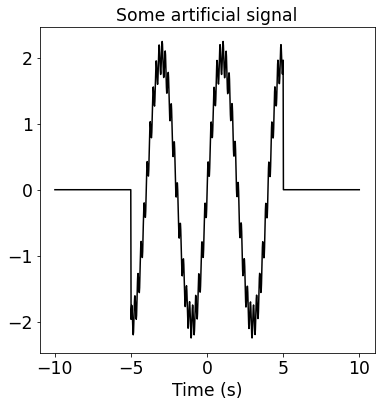

In [9]:
myfig = plt.figure(figsize=(6,6))

ax = myfig.add_subplot(1,1,1)
plt.title("Some artificial signal", fontsize=_fontsize)
plt.xlabel("Time (s)", fontsize=_fontsize)
plt.plot(t_inputs, mysig, color="xkcd:black")
ax.tick_params(labelsize=_fontsize)

#plt.savefig(fname="slides_Gabor_1D_toapply.pdf", bbox_inches="tight")
plt.show()

フィルターを応用する際、対象となる信号との畳み込みを求めることが多い。`scipy`の`signal`モジュールから、`convolve`という関数がここで最初の出番を迎える。

In [10]:
myparas = {"amp": 1/(2*math.pi),
           "sdev": 1,
           "freq": 0.25,
           "phase": 0}

out_fil_real = gabor.G_fil_real(t=t_inputs, paras=myparas)
out_fil_imag = gabor.G_fil_imag(t=t_inputs, paras=myparas)

resp_fil_real = signal.convolve(mysig, out_fil_real, mode="same")
resp_fil_imag = signal.convolve(mysig, out_fil_imag, mode="same")

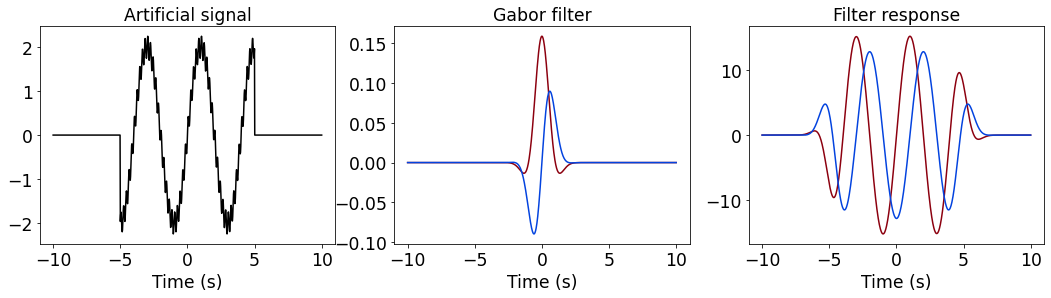

In [11]:
myfig = plt.figure(figsize=(18,4))

ax_signal = myfig.add_subplot(1,3,1)
plt.title("Artificial signal", fontsize=_fontsize)
plt.xlabel("Time (s)", fontsize=_fontsize)
ax_signal.plot(t_inputs, mysig, color="xkcd:black")
ax_signal.tick_params(labelsize=_fontsize)

ax_filter = myfig.add_subplot(1,3,2)
plt.title("Gabor filter", fontsize=_fontsize)
plt.xlabel("Time (s)", fontsize=_fontsize)
ax_filter.plot(t_inputs, out_fil_real, color="xkcd:crimson")
ax_filter.plot(t_inputs, out_fil_imag, color="xkcd:blue")
ax_filter.tick_params(labelsize=_fontsize)

ax_response = myfig.add_subplot(1,3,3)
plt.title("Filter response", fontsize=_fontsize)
plt.xlabel("Time (s)", fontsize=_fontsize)
ax_response.plot(t_inputs, resp_fil_real, color="xkcd:crimson")
ax_response.plot(t_inputs, resp_fil_imag, color="xkcd:blue")
ax_response.tick_params(labelsize=_fontsize)

#plt.savefig(fname="slides_Gabor_1D_applied.pdf", bbox_inches="tight")
plt.show()

___

<a id="2D_basics"></a>
## 2次元のGaborフィルター

In [12]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import signal
import imageio
from skimage import color as col
from skimage import filters as skfil
from scipy import ndimage as ndi

import gabor

_fontsize = "xx-large"

1次元の場合と同様に、いくつかのパラメータをdictにまとめ、フィルタの働きを制御する。

In [13]:
_pix_w = 128 # image width, in pixels
_pix_h = 128 # image height, in pixels

myparas = {"freqs": 4/max(_pix_w,_pix_h), # cycles per pixel
           "dir": math.pi/2, # orientation
           "amp": 1,
           "sdev": max(_pix_w,_pix_h)/5,
           "phase": 0}

ここで新たに見える`freqs`と`dir`とはそれぞれ、空間周波数（spatial frequency）と向き(direction)を指しており、座学資料にある$\omega$と$\theta$に対応する。

パラメータをまとめて、カスタマイズされたフィルターを作る。

In [14]:
y0 = math.floor(_pix_h/2)
x0 = math.floor(_pix_w/2)
y_inputs, x_inputs = np.mgrid[-y0:(y0+1), -x0:(x0+1)]

# Store pixel values (of envelope, carrier, filter) for plotting via imshow.
out_env = gabor.G2_env(x=x_inputs, y=y_inputs,
                            amp=myparas["amp"],
                            sdev=myparas["sdev"])
out_car_real = gabor.G2_car_real(x=x_inputs,
                                 y=y_inputs,
                                 freqx=myparas["freqs"]*math.cos(myparas["dir"]),
                                 freqy=myparas["freqs"]*math.sin(myparas["dir"]),
                                 phase=myparas["phase"])
out_fil_real = gabor.G2_fil_real(x=x_inputs, y=y_inputs, paras=myparas)

定義域が2次元なので、これらの関数のグラフも（色の濃淡などを使って）表すことができる。

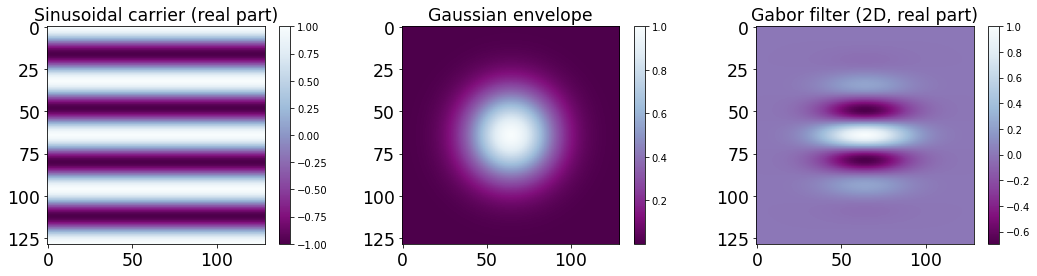

In [15]:
myfig = plt.figure(figsize=(18,4))

ax_carrier = myfig.add_subplot(1,3,1)
plt.title("Sinusoidal carrier (real part)", fontsize=_fontsize)
topass = ax_carrier.imshow(out_car_real, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)
ax_carrier.tick_params(labelsize=_fontsize)

ax_envelope = myfig.add_subplot(1,3,2)
plt.title("Gaussian envelope", fontsize=_fontsize)
topass = ax_envelope.imshow(out_env, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)
ax_envelope.tick_params(labelsize=_fontsize)

ax_filter = myfig.add_subplot(1,3,3)
plt.title("Gabor filter (2D, real part)", fontsize=_fontsize)
topass = ax_filter.imshow(out_fil_real, cmap=plt.cm.BuPu_r)
plt.colorbar(topass)
ax_filter.tick_params(labelsize=_fontsize)

#plt.savefig(fname="slides_Gabor_2D.pdf", bbox_inches="tight")
plt.show()

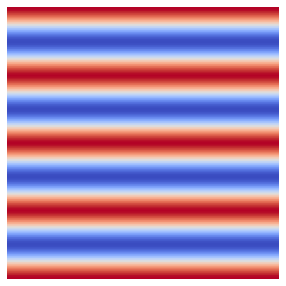

In [16]:
### FOR SLIDES. ###

myfig = plt.figure(figsize=(5,5))

ax = myfig.add_subplot(1,1,1)
plt.axis("off")
ax.imshow(out_car_real, cmap=plt.cm.coolwarm)

ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.
ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator()) # to properly center.
#plt.savefig(fname="slides_signal_2D.pdf", bbox_inches="tight")
plt.show()


___

<a id="2D_app"></a>
## （承前）2次元の応用例

基礎をおさえた上で、2次元版のガボールフィルタ（空間フィルタ）を応用していく。画像を信号と見なすということは、画素値そのものが信号の値に相当するということになる。

まずは簡単な応用例から入る。デジタル画像の読み書きを楽にしてくれるライブラリとして、__imageio__ ( http://imageio.github.io/ )が著名である。画像をすでにローカルに保存していることを前提に、次の事例に使う画像を容易に読み込むことができる。

Shape: (300, 451, 3) Type: <class 'imageio.core.util.Array'> First value (r,g,b): [143 120 104]
Shape: (128, 128, 3) Type: <class 'imageio.core.util.Array'> First value (r,g,b): [180 116  33]
Shape: (633, 801, 3) Type: <class 'imageio.core.util.Array'> First value (r,g,b): [168 165 160]


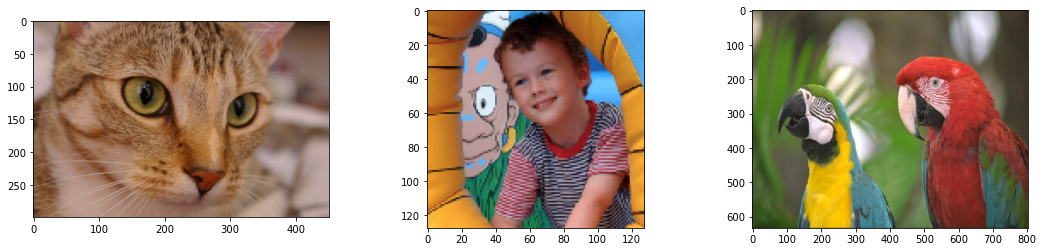

In [17]:
# Read images from file.
im_cat = imageio.v2.imread("img/chelsea.png")
im_boy = imageio.v2.imread("img/bishop.png")
im_parrots = imageio.v2.imread("img/parrots.png")

# Inspect (and plot) the images to ensure they have been read as we expect.
print("Shape:", im_cat.shape, "Type:", type(im_cat), "First value (r,g,b):", im_cat[0,0,:])
print("Shape:", im_boy.shape, "Type:", type(im_boy), "First value (r,g,b):", im_boy[0,0,:])
print("Shape:", im_parrots.shape, "Type:", type(im_parrots), "First value (r,g,b):", im_parrots[0,0,:])

myfig = plt.figure(figsize=(18,4))
ax_cat = myfig.add_subplot(1,3,1)
ax_boy = myfig.add_subplot(1,3,2)
ax_parrots = myfig.add_subplot(1,3,3)
ax_cat.imshow(im_cat)
ax_boy.imshow(im_boy)
ax_parrots.imshow(im_parrots)

plt.show()

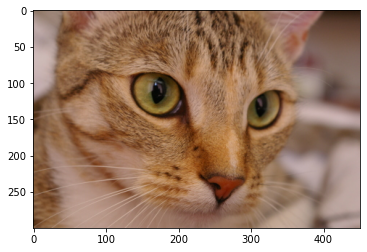

In [18]:
### FOR SLIDES. ###

myfig = plt.figure(figsize=(6,4))
ax_cat = myfig.add_subplot(1,1,1)
ax_cat.imshow(im_cat)

#plt.savefig(fname="slides_chelsea.pdf", bbox_inches="tight")
plt.show()

注目すべきは、imageioが自前の画像オブジェクトを使っていること（`ndarray`型ではない）。その利点は、RGBチャネルがきちんと認識され、カラー画像として表示されることである。

「色」を計算機で表現することは決して自明ではないが、出発点として普通のPNG形式画像のRGBチャネルを取り出していく。

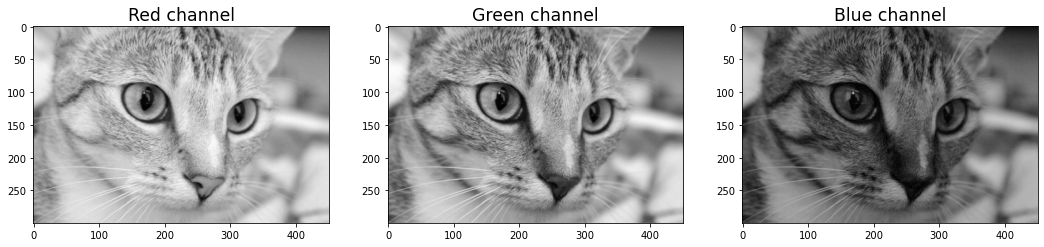

In [19]:
im = imageio.v2.imread("img/chelsea.png")

myfig = plt.figure(figsize=(18,4))
ax_R = myfig.add_subplot(1,3,1)
plt.title("Red channel", fontsize=_fontsize)
ax_R.imshow(im[:,:,0], plt.get_cmap('gray'))

ax_G = myfig.add_subplot(1,3,2)
plt.title("Green channel", fontsize=_fontsize)
ax_G.imshow(im[:,:,1], cmap=plt.get_cmap('gray'))

ax_B = myfig.add_subplot(1,3,3)
plt.title("Blue channel", fontsize=_fontsize)
ax_B.imshow(im[:,:,2], cmap=plt.get_cmap('gray'))

#plt.savefig(fname="slides_chelsea_RGBsplit.pdf", bbox_inches="tight")
plt.show()

各チャネルの度合い（白いほど高い）は上図でも十分わかるが、色のイメージを強めるために、下図のようにカラーマップを変更して表わすこともできる。

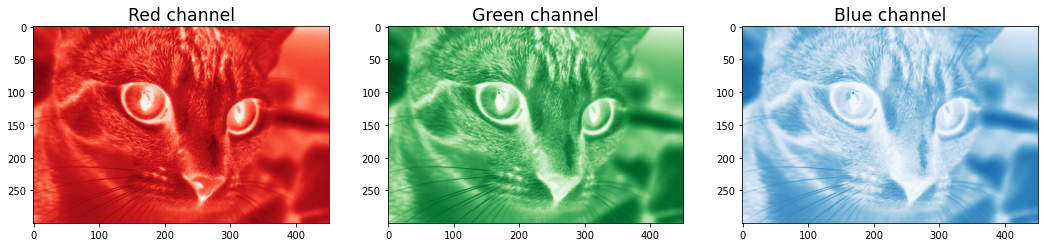

In [20]:
myfig = plt.figure(figsize=(18,4))
ax_R = myfig.add_subplot(1,3,1)
plt.title("Red channel", fontsize=_fontsize)
ax_R.imshow(im[:,:,0], cmap=plt.cm.Reds)

ax_G = myfig.add_subplot(1,3,2)
plt.title("Green channel", fontsize=_fontsize)
ax_G.imshow(im[:,:,1], cmap=plt.cm.Greens)

ax_B = myfig.add_subplot(1,3,3)
plt.title("Blue channel", fontsize=_fontsize)
ax_B.imshow(im[:,:,2], cmap=plt.cm.Blues)

#plt.savefig(fname="slides_chelsea_RGBcolors.pdf", bbox_inches="tight")
plt.show()

3つのチャネルを一つにまとめたい。RGBの3チャネルを単純に平均化することもできるが、別の色空間に変換してから、より本質的な「明度(lightness)」を捉えた配列を得ることが可能である。

代表的な方法として、元のRGBからCIE $L^{\ast}a^{\ast}b^{\ast}$へと変換した上で、$L^{\ast}$チャネルだけ使えば良い。この変換の手助けをしてくれるのが、__scikit-image__ ( http://scikit-image.org/ )である。特に、`color`というモジュールをここで駆使する。

In [21]:
# Re-read the original image from file.
im = imageio.v2.imread("img/chelsea.png")
im_xyz = col.rgb2xyz(im) # convert from RGB to XYZ colour space
im_cielab = col.xyz2lab(im_xyz) # convert from XYZ to CIE L*a*b* colour space.

print("RGB:")
print("Shape:", im.shape, "Type:", type(im), "First value (L*,a*,b*):", im[0,0,:])
print("XYZ:")
print("Shape:", im_xyz.shape, "Type:", type(im_xyz), "First value (X,Y,Z):", im_xyz[0,0,:])
print("L*a*b*:")
print("Shape:", im_cielab.shape, "Type:", type(im_cielab), "First value (L*,a*,b*):", im_cielab[0,0,:])

RGB:
Shape: (300, 451, 3) Type: <class 'imageio.core.util.Array'> First value (L*,a*,b*): [143 120 104]
XYZ:
Shape: (300, 451, 3) Type: <class 'numpy.ndarray'> First value (X,Y,Z): [0.20542868 0.20272827 0.15923899]
L*a*b*:
Shape: (300, 451, 3) Type: <class 'numpy.ndarray'> First value (L*,a*,b*): [52.14428353  6.33656553 12.11784839]


色表現の変換をすると、データ型が`ndarray`になっているということに注意しながら、「明度」だけ取り出すことにする。別の言い方をすると、CIE $L^{\ast}a^{\ast}b^{\ast}$表現の色情報をすべて捨てることになる。参考として、通常のグレースケール変換（RGBの非一様な平均）と比較する。

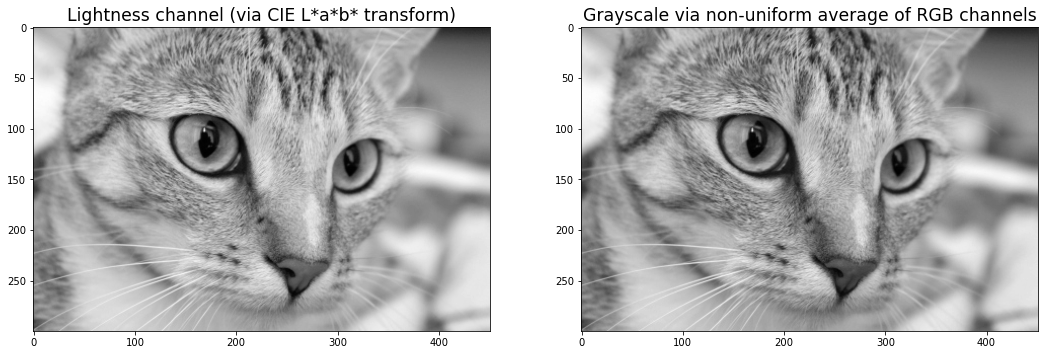

In [22]:
im_L = im_cielab[:,:,0] # the lightness channel of CIE-Lab.
im_gs = col.rgb2gray(im) # the "luminance" by a non-uniform weighted ave of RGB.

myfig = plt.figure(figsize=(18,9))
ax_L = myfig.add_subplot(1,2,1)
plt.title("Lightness channel (via CIE L*a*b* transform)", fontsize=_fontsize)
#plt.axis("off")
ax_gs = myfig.add_subplot(1,2,2)
plt.title("Grayscale via non-uniform average of RGB channels", fontsize=_fontsize)
#plt.axis("off")
ax_L.imshow(im_L, cmap=plt.get_cmap('gray'))
ax_gs.imshow(im_gs, cmap=plt.get_cmap('gray'))

#plt.savefig(fname="slides_chelsea_GS_L.pdf", bbox_inches="tight")
plt.show()

かなり微妙な違いではあるが、上の2枚の画像が異なっており、それぞれ視覚的な特徴を持つことは確かである。また、画像を2次元`ndarray`配列として表現しているので、画像を2次元平面上の信号として見なすことができて、まさしくGaborフィルターを応用する対象となった。

次は、我々のフィルターと、有名なライブラリーで実装されたフィルターの出力結果を比較してみよう。パラメータがたくさんあり、また文献上ではやり方が実に多様であるため、標準的なカーネルのアウトプットと我々のカーネル（2次元Gaborフィルターそのもの）の出力を比較し、概ね期待するような働きをしているかどうか確認する。標準として、scikit-imageの`filters`モジュール（ http://scikit-image.org/docs/dev/api/skimage.filters.html ）の力を拝借し、パラメータを決めて可視化する。

In [23]:
myparas = {"freqs": 8/max(_pix_w,_pix_h),
           "dir": math.pi/2,
           "amp": 1,
           "sdev": max(_pix_w,_pix_h)/5,
           "phase": 0}

ours = gabor.G2_fil_kernel(paras=myparas, n_stds=3)

theirs = skfil.gabor_kernel(frequency=myparas["freqs"],
                            theta=myparas["dir"],
                            bandwidth=1,
                            sigma_x=myparas["sdev"],
                            sigma_y=myparas["sdev"],
                            n_stds=3,
                            offset=0)

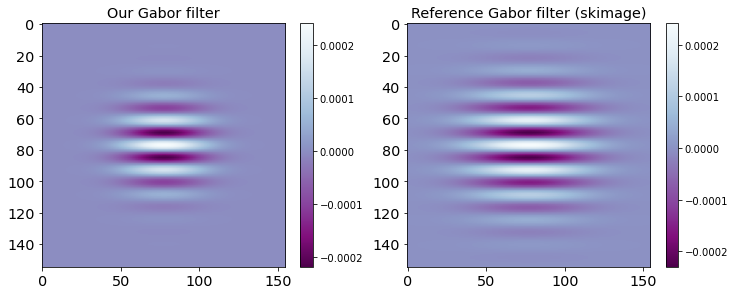

In [24]:
myfig = plt.figure(figsize=(12,6))

ax_ours = myfig.add_subplot(1,2,1)
plt.title("Our Gabor filter", fontsize="x-large")
topass = ax_ours.imshow(ours["real"], cmap=plt.cm.BuPu_r)
plt.colorbar(topass, shrink=0.75)
ax_ours.tick_params(labelsize="x-large")

ax_theirs = myfig.add_subplot(1,2,2)
plt.title("Reference Gabor filter (skimage)", fontsize="x-large")
topass = ax_theirs.imshow(theirs.real, cmap=plt.cm.BuPu_r)
plt.colorbar(topass, shrink=0.75)
ax_theirs.tick_params(labelsize="x-large")

#plt.savefig(fname="slides_Gabor_2D_kernel_check.pdf", bbox_inches="tight")
plt.show()

明らかなように、細部が異なるといえども、粗方合っている。我流の実装が間違っていないと一安心し、作業を続ける。

1次元のケースとまったく同様に、対象信号とフィルターの畳み込みを求めることで「フィルターをかける」ことになる。ここでは、畳み込みを自分では実装せず、`scipy`の`ndimage`モジュールの力を借りることにする。使うのは`convolve`という関数である( https://docs.scipy.org/doc/scipy/reference/ndimage.html )。

重要な引数が2つある：

 - `input`： これは`ndarray`型のオブジェクトで、入力信号に相当する。普通はデジタル画像や動画のフレームなど。
 - `weights`： これは`ndarray`型のオブジェクトで、フィルタ信号の値である。ここでは2次元ガボールフィルタの値から構成される。画像処理の世界ではよく「カーネル」と呼ばれる。

我々の自作ガボールフィルタが見やすくなるように、これまではその大きさを特に気にせずにやってきた。しかし、実務にあたっては、限りなく拡がるガウス関数の範囲を小さくしたほうが圧倒的に効率的である。つまり、掛け合わせる重みがほぼゼロならば、無視して計算時間を省いたほうが賢明、ということである。下記ではこのようなカーネルを造る。

In [25]:
im = imageio.v2.imread("img/chelsea.png")
im_L = col.xyz2lab(col.rgb2xyz(im))[:,:,0]
_pix_h = im_L.shape[0]
_pix_w = im_L.shape[1]

myparas = {"freqs": 32/max(_pix_w,_pix_h),
           "dir": math.pi/2,
           "amp": 0.1,
           "sdev": max(_pix_w,_pix_h)/20,
           "phase": 0}
mymode = "reflect"
mycval = 0

out_fil = gabor.G2_fil_kernel(paras=myparas, n_stds=3)

一定の時間はかかるが、畳み込みをここで実行する。なお、実部と虚部で2つのフィルタがあるため、同じ画像と2回畳み込むことになる。

In [26]:
print("Convolving w/ real part (takes time)...", end=" ")
resp_fil_real = ndi.convolve(input=im_L, weights=out_fil["real"],
                             mode=mymode, cval=mycval)
print("OK.")
print("Convolving w/ imaginary part (takes time)...", end=" ")
resp_fil_imag = ndi.convolve(input=im_L, weights=out_fil["imag"],
                             mode=mymode, cval=mycval)
print("OK.")

Convolving w/ real part (takes time)... OK.
Convolving w/ imaginary part (takes time)... OK.


フィルターをかけた結果の実部と虚部をそれぞれ可視化する。

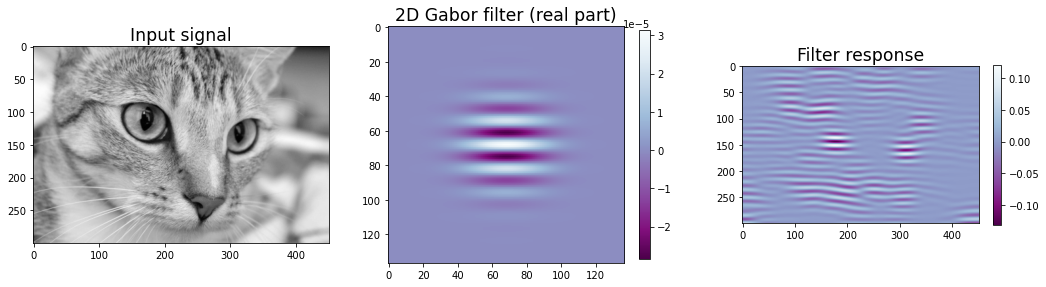

In [27]:
myfig = plt.figure(figsize=(18,6))

ax_signal = myfig.add_subplot(1,3,1)
plt.title("Input signal", fontsize=_fontsize)
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(1,3,2)
plt.title("2D Gabor filter (real part)", fontsize=_fontsize)
topass = ax_filter.imshow(out_fil["real"], cmap=plt.cm.BuPu_r)
plt.colorbar(topass, shrink=0.7)

ax_response = myfig.add_subplot(1,3,3)
plt.title("Filter response", fontsize=_fontsize)
topass = ax_response.imshow(resp_fil_real, cmap=plt.cm.BuPu_r)
plt.colorbar(topass, shrink=0.49)

#plt.savefig(fname="slides_Gabor_2D_applied_real.pdf", bbox_inches="tight")
plt.show()

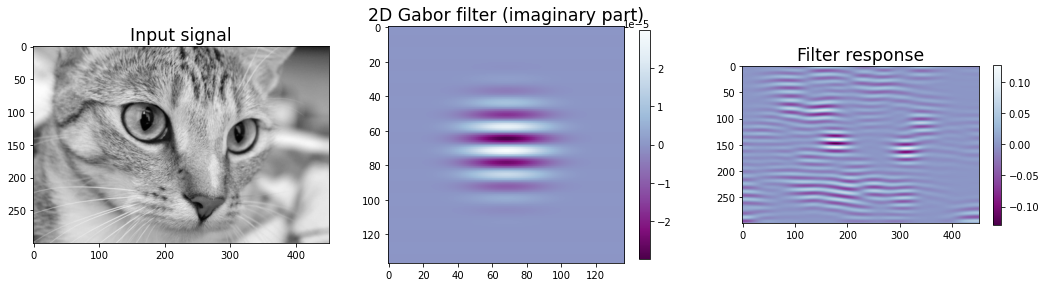

In [28]:
myfig = plt.figure(figsize=(18,6))

ax_signal = myfig.add_subplot(1,3,1)
plt.title("Input signal", fontsize=_fontsize)
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(1,3,2)
plt.title("2D Gabor filter (imaginary part)", fontsize=_fontsize)
topass = ax_filter.imshow(out_fil["imag"], cmap=plt.cm.BuPu_r)
plt.colorbar(topass, shrink=0.7)

ax_response = myfig.add_subplot(1,3,3)
plt.title("Filter response", fontsize=_fontsize)
topass = ax_response.imshow(resp_fil_imag, cmap=plt.cm.BuPu_r)
plt.colorbar(topass, shrink=0.49)

#plt.savefig(fname="slides_Gabor_2D_applied_im.pdf", bbox_inches="tight")
plt.show()

特徴量を造る準備が整った。フィルターをかけた結果の全画素（実部と虚部）を使うことは原理的には可能だが、冗長性が高く、計算的な制約もあるため、一部の情報を捨てて、コンパクトな特徴量を求める。

まず、複素数のノルムをとって、実部と虚部のを融合させて、フィルター全体として強く応答している領域を明らかにしよう。

In [29]:
# Magnitude of the complex filter response.
fil_response_magnitude = np.sqrt((resp_fil_real**2+resp_fil_imag**2))

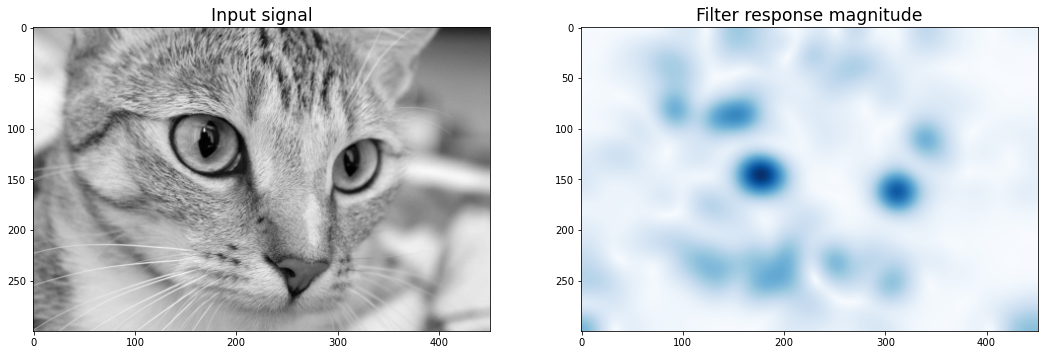

In [30]:
myfig = plt.figure(figsize=(18,12))

ax_signal = myfig.add_subplot(1,2,1)
plt.title("Input signal", fontsize=_fontsize)
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(1,2,2)
plt.title("Filter response magnitude", fontsize=_fontsize)
ax_filter.imshow(fil_response_magnitude, cmap=plt.cm.Blues)

#plt.savefig(fname="slides_Gabor_2D_applied_norm.pdf", bbox_inches="tight")
plt.show()

さらに、全画素ではなく、特徴的な「領域」さえ把握できれば十分であるから、画素の部分集合（パッチ）ごとにいくつかの統計量を計算し、各領域の代表値を叩き出す。

In [31]:
_grid_h = 5
_grid_w = 6

# Compute per-patch statistics.
mystats = gabor.patch_stats(image=fil_response_magnitude,
                            grid_h=_grid_h, grid_w=_grid_w)

これらの統計量を特徴量としても良いが、あまり増加しすぎないように、最後に非線形な関数を使ったひと工夫をする。

In [32]:
features = gabor.nonlin(mystats["mean"])

領域分割の方法と、最終的な計算結果を以下のように表わす。

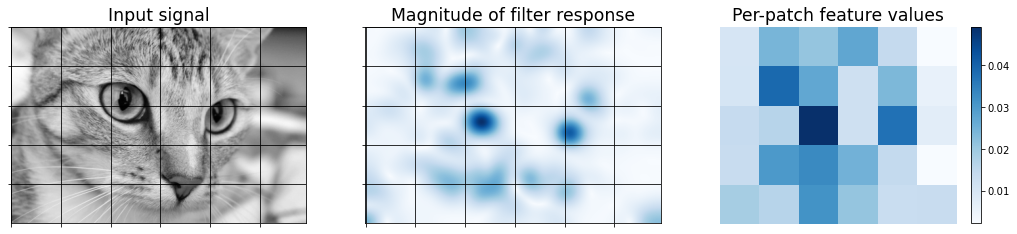

In [33]:
# Pass the per-patch magnitude statistics through a non-linear function,
# and arrange into a matrix such that correspondence between feature
# values and sub-regions of the image is clear.
features = features.reshape((_grid_h,_grid_w))

myfig = plt.figure(figsize=(18,6))

ax_signal = myfig.add_subplot(1,3,1)
plt.title("Input signal", fontsize=_fontsize)
ax_signal.set_xticks(np.arange(0, _pix_w, math.ceil(_pix_w/_grid_w)))
ax_signal.set_yticks(np.arange(0, _pix_h, math.ceil(_pix_h/_grid_h)))
ax_signal.grid(linestyle="-", color='black')
ax_signal.set_yticklabels([])
ax_signal.set_xticklabels([])
ax_signal.imshow(im_L, cmap=plt.get_cmap('gray'))

ax_filter = myfig.add_subplot(1,3,2)
plt.title("Magnitude of filter response", fontsize=_fontsize)
ax_filter.set_xticks(np.arange(0, _pix_w, math.ceil(_pix_w/_grid_w)))
ax_filter.set_yticks(np.arange(0, _pix_h, math.ceil(_pix_h/_grid_h)))
ax_filter.grid(linestyle="-", color='black')
ax_filter.set_yticklabels([])
ax_filter.set_xticklabels([])
ax_filter.imshow(fil_response_magnitude, cmap=plt.cm.Blues)

ax_features = myfig.add_subplot(1,3,3)
plt.title("Per-patch feature values", fontsize=_fontsize)
topass = ax_features.imshow(features, cmap=plt.cm.Blues)
ax_features.axis("off")
myfig.colorbar(topass, shrink=0.6)

#plt.savefig(fname="slides_Gabor_2D_features.pdf", bbox_inches="tight")
plt.show()

___